In [18]:
import pandas as pd
df = pd.read_csv("/Users/maheshshirsath/Downloads/Machine_learning/spotify_analysis_dataset.csv")

print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
  track_id track_name     artist     album release_date  duration_ms  \
0  TRK1000     Song 0   Artist 7   Album 3   2010-01-01       240151   
1  TRK1001     Song 1   Artist 4   Album 5   2010-01-02       253767   
2  TRK1002     Song 2  Artist 13  Album 19   2010-01-03       244375   
3  TRK1003     Song 3  Artist 11   Album 7   2010-01-04       299262   
4  TRK1004     Song 4   Artist 8   Album 9   2010-01-05       256330   

   popularity  danceability  energy  loudness  speechiness  acousticness  \
0          70         0.037   0.349     -2.87        0.522         0.616   
1          58         0.610   0.726    -22.87        0.770         0.635   
2          85         0.503   0.897     -1.33        0.216         0.045   
3          27         0.051   0.887     -1.46        0.623         0.375   
4          65         0.279   0.780     -5.88        0.085         0.626   

   instrumentalness  liveness  valence   tempo  
0             0.931     0.947    

Logistic Probability: [[0.45712845 0.54287155]]
Logistic Prediction: 1


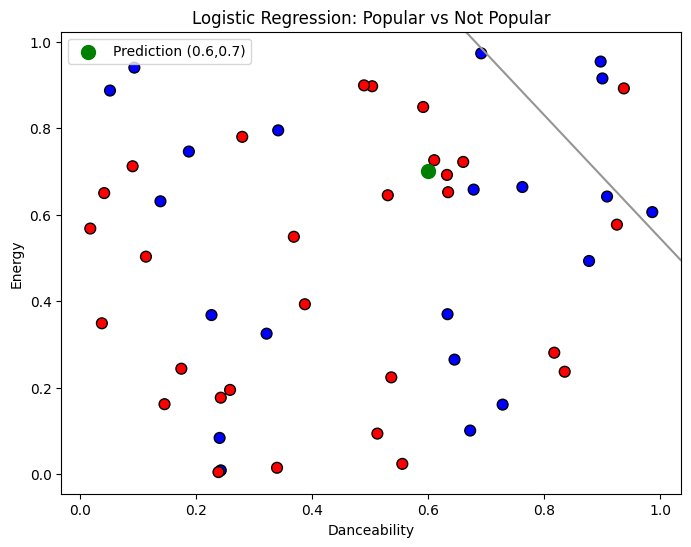

In [26]:
#Logistic regression:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_log, y_log)


new_data = pd.DataFrame([[0.6, 0.7]], columns=['danceability', 'energy'])
probability = log_reg.predict_proba(new_data)
prediction = log_reg.predict(new_data)
print("Logistic Probability:", probability)
print("Logistic Prediction:", prediction[0])

plt.figure(figsize=(8, 6))


plt.scatter(X_log['danceability'], X_log['energy'], c=y_log, cmap='bwr', edgecolor='k', s=60)

xx, yy = np.meshgrid(
    np.linspace(X_log['danceability'].min()-0.05, X_log['danceability'].max()+0.05, 200),
    np.linspace(X_log['energy'].min()-0.05, X_log['energy'].max()+0.05, 200)
)
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['danceability', 'energy'])
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)


plt.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1)


plt.scatter(new_data['danceability'], new_data['energy'], color='green', s=100, label='Prediction (0.6,0.7)')

plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Logistic Regression: Popular vs Not Popular')
plt.legend()
plt.show()
